In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import h5py


In [58]:

def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [59]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data() 

In [60]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [61]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [62]:
X_train=(X_train-X_train.min())/X_train.max()
X_test=(X_test-X_train.min())/X_train.max()

In [63]:
X_train.max(),X_train.min()

(1.0, 0.0)

In [64]:
model=keras.Sequential()
model.add(keras.layers.Input((28,28,1)))
model.add(keras.layers.Conv2D(8,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))



In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 13, 13, 8)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 6, 6, 16)         

In [66]:
model.compile(optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
1875/1875 [==============================] - 133s 67ms/step - loss: 0.4124 - accuracy: 0.8694
Epoch 2/300
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1857 - accuracy: 0.9438
Epoch 3/300
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1463 - accuracy: 0.9557
Epoch 4/300
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1243 - accuracy: 0.9630
Epoch 5/300
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1137 - accuracy: 0.9658
Epoch 6/300
1875/1875 [==============================] - 127s 67ms/step - loss: 0.1028 - accuracy: 0.9689
Epoch 7/300
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0936 - accuracy: 0.9714
Epoch 8/300
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0904 - accuracy: 0.9727
Epoch 9/300
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0829 - accuracy: 0.9750
Epoch 10/300
1875/1875 [======================

1875/1875 [==============================] - 120s 64ms/step - loss: 0.0474 - accuracy: 0.9849
Epoch 154/300
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 155/300
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0468 - accuracy: 0.9862
Epoch 156/300
1479/1875 [======================>.......] - ETA: 23s - loss: 0.0447 - accuracy: 0.9856

In [42]:
score=model.evaluate(X_test,y_test)
print("loss is",score[0])
print("accuracy is",score[1])

313/313 [==============================] - 11s 31ms/step - loss: 7.6879 - accuracy: 0.9813
loss is 7.687867164611816
accuracy is 0.9812999963760376


In [29]:
predict_proba = model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)
print(predictions[:10])
print(y_test[:10])
type(X_test)

313/313 [==============================] - 10s 31ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


numpy.ndarray

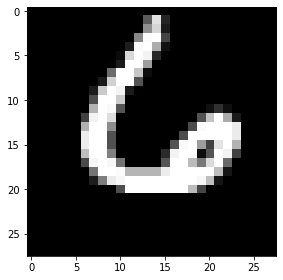

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.imshow(X_train[241], cmap='gray')

plt.tight_layout()
plt.show()